In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [6]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
df.loc[df['Gender'] == 'Female', 'Gender'] = 0
df.loc[df['Gender'] == 'Male', 'Gender'] = 1
#df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


In [14]:
X = df[['Gender','Age','EstimatedSalary']].values
Y =df['Purchased'].values

In [15]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()
X[ : , 1:] = stsc.fit_transform(X[ : , 1:])

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 5)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 5)


In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred_test = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)

####  Confusion Matrix = Is a summarized table used to assess the performance of a classification model

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[48,  5],
       [ 6, 21]], dtype=int64)

In [26]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


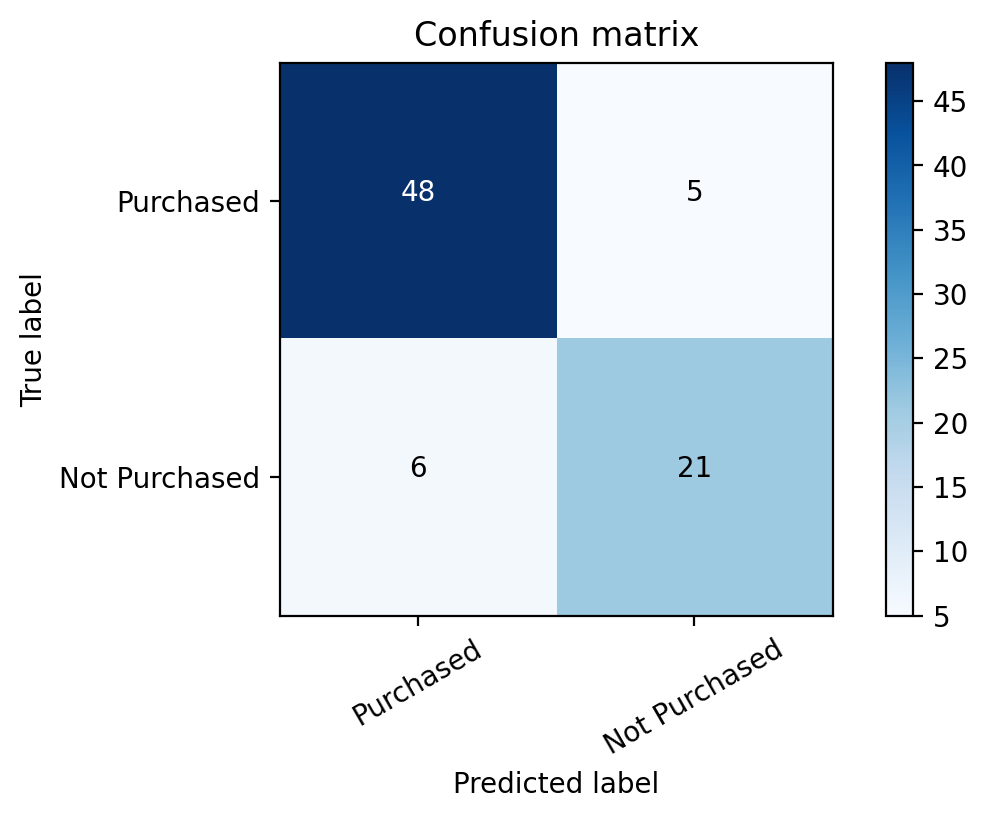

In [27]:
classes = ['Purchased', 'Not Purchased']
plt.figure(dpi = 200)
plot_confusion_matrix(cm, classes)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.8625

In [29]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_test)

0.8076923076923077

In [30]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_test)

0.7777777777777778

In [31]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred_test)

0.65625

In [32]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_test)

4.749131729139607

Naive Bayes Classifier

In [33]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)


GaussianNB()

In [36]:
y_pred = nb_classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.8875

In [37]:
nb_classifier.score(x_test,y_test)

0.8875